![example](images/director_shot.jpeg)

# Microsoft Movie Studio Data Analysis and Recommendations

**Author:** Alexis Kedo
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
imdb_names = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_titles_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
bom_gross_earnings = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
moviedb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rt_movies = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
imdb_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')

In [3]:
imdb_titles_basics.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
imdb_titles_basics.shape


(146144, 6)

In [5]:
imdb_titles_akas.head()


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
imdb_titles_akas.shape


(331703, 8)

In [7]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
imdb_ratings.shape


(73856, 3)

In [9]:
imdb_crew.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [10]:
imdb_crew.shape


(146144, 3)

In [11]:
imdb_principals.head()


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [12]:
imdb_principals.shape


(1028186, 6)

In [13]:
bom_gross_earnings.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
bom_gross_earnings.shape


(3387, 5)

In [15]:
budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
budgets.shape

(5782, 6)

In [17]:
moviedb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
moviedb_movies.shape

(26517, 10)

In [19]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
rt_reviews.shape

(54432, 8)

In [21]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [22]:
rt_movies.shape

(1560, 12)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [23]:
# Standardize movie titles across dataframes. 
budgets['movie'] = budgets['movie'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark_phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers_age_of_ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star_wars_ep_viii_the_last_jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
moviedb_movies['title'] = moviedb_movies['title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
moviedb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron_man_2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy_story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


In [25]:
 budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
moviedb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [28]:
moviedb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [29]:
moviedb_movies.duplicated().sum()

0

In [30]:
budgets.duplicated().sum()

0

In [31]:
# Change release date column into DateTime format. 
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [32]:
moviedb_movies['release_date'] = pd.to_datetime(moviedb_movies['release_date'])
moviedb_movies.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610


## Data Modeling
Describe and justify the process for analyzing or modeling the data.
***
Questions to consider:

* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?

In [33]:
# Here you run your code to model the data
# Research Question 1: What release months contain the most popular movies on the Movie DB data? 

# Make another column ("month") containing just the month from the "release_date" column. 
moviedb_movies["month"] = moviedb_movies["release_date"].dt.month
moviedb_movies.head()

clean_moviedb = moviedb_movies.drop(columns = ['Unnamed: 0', 'id', 'original_language', 'original_title'], axis = 1)

# clean_moviedb_count = clean_moviedb.groupby(by = ['month']).agg(['count'])

# clean_moviedb_count

In [34]:
# Change datatype of ['month'] column to string
clean_moviedb['month'] = clean_moviedb['month'].astype('str')

# Enumerate to replace values in ['month'] with names of months 

for i, element in enumerate(clean_moviedb['month']): 
    if element == '1':
        clean_moviedb['month'][i] = 'January'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif element == '2': 
        clean_moviedb['month'][i] = 'February'
    elif '3' in element: 
        clean_moviedb['month'][i] = 'March'
    elif '4' in element: 
        clean_moviedb['month'][i] = 'April' 
    elif '5' in element:
        clean_moviedb['month'][i] = 'May'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif '6' in element: 
        clean_moviedb['month'][i] = 'June'
    elif '7' in element: 
        clean_moviedb['month'][i] = 'July'
    elif '8' in element: 
        clean_moviedb['month'][i] = 'August'    
    elif '9' in element:
        clean_moviedb['month'][i] = 'September'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif '10' in element: 
        clean_moviedb['month'][i] = 'October'
    elif '11' in element: 
        clean_moviedb['month'][i] = 'November'
    elif '12' in element: 
        clean_moviedb['month'][i] = 'December' 
        
clean_moviedb.head()

<ipython-input-34-d41c67345e7a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'November'
<ipython-input-34-d41c67345e7a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'March'
<ipython-input-34-d41c67345e7a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'May'
<ipython-input-34-d41c67345e7a>:22: SettingWithCopyWarning: 
A value is trying to be

,genre_ids,popularity,release_date,title,vote_average,vote_count,month
0,"[12, 14, 10751]",33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788,November
1,"[14, 12, 16, 10751]",28.734,2010-03-26,how_to_train_your_dragon,7.7,7610,March
2,"[12, 28, 878]",28.515,2010-05-07,iron_man_2,6.8,12368,May
3,"[16, 35, 10751]",28.005,1995-11-22,toy_story,7.9,10174,November
4,"[28, 878, 12]",27.920,2010-07-16,inception,8.3,22186,July


In [35]:
clean_moviedb['month'].value_counts()

January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: month, dtype: int64

In [36]:
clean_moviedb['popularity'].mean()

3.130912244974922

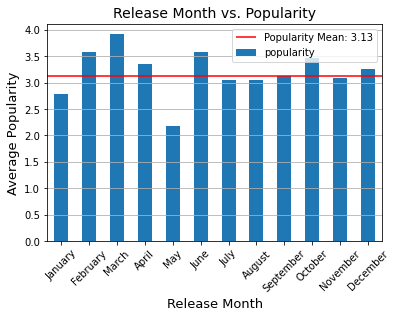

In [37]:
#Plot by Month and Average Popularity to figure out the most popular month to release movies. 

#Make the group of the data according to their release month, find the mean popularity related to this, and plot.
from matplotlib import pyplot as plt
clean_moviedb.groupby('month')['popularity'].mean().plot(kind = 'bar')

#Set up the title of the graph. 
plt.title("Release Month vs. Popularity",fontsize = 14)

#Setup the x-axis label and y-axis label of the graph.
plt.xlabel('Release Month',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
axes = plt.gca()
axes.yaxis.grid()

#Insert mean popularity
plt.hlines(y=clean_moviedb['popularity'].mean(),xmin=-.5, xmax=11.5,color='red',
           label=f"Popularity Mean: {clean_moviedb['popularity'].mean():.2f}") 

# Change x-axis tick labels to display names (not numbers) of months. 
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45)  # Set text labels and properties.
plt.legend()
plt.show()

Describe chart 
- most popular
- least popular

What's driving the trend we're seeing? 
May? 

- Compare to count of movies by month / how many movies are getting released? double y-axis? 

In [38]:
#Research Question 2: Which genres of movies are the most profitable? 
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [39]:
imdb_titles_basics.shape

(146144, 6)

In [40]:
imdb_titles_basics['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Comedy,History,Mystery             1
Documentary,Mystery,Romance        1
Musical,Reality-TV                 1
Adventure,Biography,Family         1
Animation,Crime,Music              1
Name: genres, Length: 1085, dtype: int64

In [41]:
imdb_titles_basics['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [42]:
imdb_titles_basics['genres'].isna().sum()

5408

In [43]:
imdb_titles_basics['genres'].isna().sum()/len(imdb_titles_basics)

0.037004598204510616

In [44]:
imdb_titles_basics['genres'] = imdb_titles_basics['genres'].fillna("Unknown")

In [45]:
# Get a unique genres list. 
unique_genres_list = []
for genre_details in imdb_titles_basics['genres']: 
    genres_list = genre_details.split(",")
    for genre in genres_list: 
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))

In [46]:
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [47]:
# Create columns for each unique genre
for genre in unique_genres_list: 
    imdb_titles_basics[genre]=0

In [48]:
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Use a loop to populate those genre columns
# Code courtesy of Lindsey Berlin 
for index, genre_details in enumerate(imdb_titles_basics['genres']): 
    for genre in unique_genres_list: 
        if genre in genre_details: 
            #If a genre is in te genres column for that row, it'll add a 1 to that genre's column
            imdb_titles_basics.at[index,genre] = 1
            # This is the same as imdb[genre][index] = 1, but pandas like .at more than using the above syntax

In [50]:
imdb_titles_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Preparing to join imdb_titles_basics wtih budgets dataframe
# Budgets dataframe titles already reformatted; need to do the same with imdb_titles_basics
imdb_titles_basics['primary_title'] = imdb_titles_basics['primary_title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Drop unneeded columns in IMDB dataframe and rename because it's annoying
imdb = imdb_titles_basics.drop(columns = ['original_title', 'runtime_minutes'])
imdb.head()

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,2013,"Action,Crime,Drama",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,2019,"Biography,Drama",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,2018,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,2018,"Comedy,Drama",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,2017,"Comedy,Drama,Fantasy",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Sort by title identifier to see movies in alphabetical order (I just prefer this way)
imdb = imdb.sort_values(by=['primary_title'])

In [54]:
# Check for rows with duplicate titles and years in IMDB dataframe 
imdb_dupes = imdb.loc[imdb.duplicated(subset=['primary_title', 'start_year'], keep=False) == True]

In [55]:
imdb_dupes.shape

(4290, 32)

In [56]:
imdb_dupes.head(50)

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
112668,tt6608094,,2017,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
915,tt10057838,,2017,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42007,tt2518788,1,2013,"Documentary,History,Sport",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39006,tt2395385,1,2013,"Horror,Sci-Fi,Thriller",0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
129979,tt8034014,100_milioni_di_bracciate,2017,Biography,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
129962,tt8032828,100_milioni_di_bracciate,2017,Biography,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33202,tt2243123,1010,2011,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19848,tt1843081,1010,2011,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29723,tt2139521,111111,2011,"Comedy,Romance",0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
14289,tt1712159,111111,2011,"Horror,Mystery,Thriller",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
#Reminding myself the size of total dataset and calculating what % of it is duplicated data 
imdb.shape
4290/146144

0.029354609152616597

In [58]:
# Duplicates account for less than 3% of data; I'm going to drop them because they are inaccurate. For example, I Googled the film "88" and it is clearly a thriller, not a family or documentary film.
imdb_clean = imdb.drop_duplicates(subset=['primary_title','start_year'], keep=False,)

In [59]:
#While I'm thinking about it, rename "primary_title" column to "movie" to match budgets dataframe 
imdb_clean = imdb_clean.rename(columns={"primary_title": "movie"})
imdb_clean

,tconst,movie,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
4642,tt10423688,,2019,"Fantasy,Sci-Fi",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
107424,tt6290346,,2013,"Crime,Documentary",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139783,tt9046926,0000_a_shark_odyssey,2018,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
145395,tt9811798,0009_the_sharks_make_contact,2019,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3174,tt10315070,0010_the_sharks_make_contact__part_2,2020,"Animation,Comedy,Sci-Fi",0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143884,tt9598594,üç_harfliler_adak,2019,"Horror,Thriller",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
134885,tt8514766,üç_harflilerin_musallat_oldugu_büyülü_konakta_...,2018,"Comedy,Horror,Thriller",0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
77156,tt4422510,üç_iki_bir_kestik,2014,Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114079,tt6735450,üçüncü_bölgeden_hücum_varyasyonlari,2017,"Documentary,Sport",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
# Repeat cleaning process for budgets dataframe: sort by titles in alphabetical order; create a dupes dataframe to figure out how we will handle these; and create new clean_budgets dataframe. 
budgets = budgets.sort_values(by=['movie'])
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
350,51,2008-03-07,10000_bc,"$105,000,000","$94,784,201","$269,065,678"
505,6,2000-11-22,102_dalmatians,"$85,000,000","$66,941,559","$66,941,559"
4253,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616"
3262,63,1999-03-31,10_things_i_hate_about_you,"$13,000,000","$38,177,966","$60,413,950"
...,...,...,...,...,...,...
156,57,2016-03-04,zootopia,"$150,000,000","$341,268,248","$1,019,429,616"
2981,82,2013-12-31,zulu,"$16,000,000",$0,"$1,844,228"
2447,48,2007-04-06,zwartboek,"$22,000,000","$4,398,532","$27,238,354"
4756,57,2008-04-15,ã_lintãrieur,"$3,000,000",$0,"$895,932"


In [61]:
budgets_dupes = budgets.loc[budgets.duplicated(subset=['movie'], keep=False) == True]
budgets_dupes.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,71,1954-12-23,20000_leagues_under_the_sea,"$5,000,000","$28,200,000","$28,200,000"
5614,15,1916-12-24,20000_leagues_under_the_sea,"$200,000","$8,000,000","$8,000,000"
1648,49,2010-04-30,a_nightmare_on_elm_street,"$35,000,000","$63,075,011","$117,729,621"
5016,17,1984-11-09,a_nightmare_on_elm_street,"$1,800,000","$25,504,513","$25,504,513"
2032,33,1992-11-11,aladdin,"$28,000,000","$217,350,219","$504,050,219"
80,81,2019-05-24,aladdin,"$182,000,000","$246,734,314","$619,234,314"
4759,60,1951-07-28,alice_in_wonderland,"$3,000,000",$0,$0
50,51,2010-03-05,alice_in_wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4120,21,1956-10-17,around_the_world_in_80_days,"$6,000,000","$42,000,000","$42,000,000"
340,41,2004-06-16,around_the_world_in_80_days,"$110,000,000","$24,004,159","$72,004,159"


In [62]:
print(budgets_dupes.shape)
print(budgets.shape)
print(165/5782)
# Duplicate movies in the budgets dataframe constitute less than 3% of the data, like in the imdb dataframe. 
# However, in this case the data seems to be more reliable -- the release dates are all different and, as you can see
# above, most of the duplicate titles seem to be remakes. For these reasons, I'll keep the duplicate data in this case. 

(165, 6)
(5782, 6)
0.02853683846419924


In [63]:
# Before I merge, create a new movie-year column to try to reduce duplicates further. 
imdb_clean['movie_year'] = imdb_clean['movie'] + " " + imdb_clean['start_year'].astype('str')
imdb_clean

,tconst,movie,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western,movie_year
4642,tt10423688,,2019,"Fantasy,Sci-Fi",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2019
107424,tt6290346,,2013,"Crime,Documentary",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013
139783,tt9046926,0000_a_shark_odyssey,2018,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0000_a_shark_odyssey 2018
145395,tt9811798,0009_the_sharks_make_contact,2019,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0009_the_sharks_make_contact 2019
3174,tt10315070,0010_the_sharks_make_contact__part_2,2020,"Animation,Comedy,Sci-Fi",0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0010_the_sharks_make_contact__part_2 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143884,tt9598594,üç_harfliler_adak,2019,"Horror,Thriller",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,üç_harfliler_adak 2019
134885,tt8514766,üç_harflilerin_musallat_oldugu_büyülü_konakta_...,2018,"Comedy,Horror,Thriller",0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,üç_harflilerin_musallat_oldugu_büyülü_konakta_...
77156,tt4422510,üç_iki_bir_kestik,2014,Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,üç_iki_bir_kestik 2014
114079,tt6735450,üçüncü_bölgeden_hücum_varyasyonlari,2017,"Documentary,Sport",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,üçüncü_bölgeden_hücum_varyasyonlari 2017


In [64]:
#Do the same with budgets dataframe
budgets['year'] = pd.DatetimeIndex(budgets['release_date']).year
budgets['movie_year'] = budgets['movie'] + " " + budgets['year'].astype('str')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_year
350,51,2008-03-07,10000_bc,"$105,000,000","$94,784,201","$269,065,678",2008,10000_bc 2008
505,6,2000-11-22,102_dalmatians,"$85,000,000","$66,941,559","$66,941,559",2000,102_dalmatians 2000
4253,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422",2016,10_cloverfield_lane 2016
3447,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616",2015,10_days_in_a_madhouse 2015
3262,63,1999-03-31,10_things_i_hate_about_you,"$13,000,000","$38,177,966","$60,413,950",1999,10_things_i_hate_about_you 1999


In [65]:
# Now, attempt a merge
imdb_budgets = pd.merge(
    imdb_clean,
    budgets,
    how='inner',
    on ='movie_year')
imdb_budgets.head()

,tconst,movie_x,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,War,Western,movie_year,id,release_date,movie_y,production_budget,domestic_gross,worldwide_gross,year
0,tt1179933,10_cloverfield_lane,2016,"Drama,Horror,Mystery",0,0,0,0,0,0,...,0,0,10_cloverfield_lane 2016,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422",2016
1,tt3453052,10_days_in_a_madhouse,2015,Drama,0,0,0,0,0,0,...,0,0,10_days_in_a_madhouse 2015,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616",2015
2,tt1542344,127_hours,2010,"Adventure,Biography,Drama",0,0,1,0,1,0,...,0,0,127_hours 2010,6,2010-11-05,127_hours,"$18,000,000","$18,335,230","$60,217,171",2010
3,tt1413492,12_strong,2018,"Action,Drama,History",1,0,0,0,0,0,...,0,0,12_strong 2018,64,2018-01-19,12_strong,"$35,000,000","$45,819,713","$71,118,378",2018
4,tt2024544,12_years_a_slave,2013,"Biography,Drama,History",0,0,0,0,1,0,...,0,0,12_years_a_slave 2013,18,2013-10-18,12_years_a_slave,"$20,000,000","$56,671,993","$181,025,343",2013


In [66]:
print(imdb_clean.shape)
print(budgets.shape)
print(imdb_budgets.shape)

(141854, 33)
(5782, 8)
(1493, 40)


In [67]:
#Clean up this table a bit by dropping unnecessary columns and moving titles and earnings info to the front
genres_and_earnings = imdb_budgets.drop(['tconst', 'movie_x', 'start_year', 'id', 'release_date', 'year', 'genres', 'movie_y'], axis=1)
genres_and_earnings = genres_and_earnings[['movie_year', 'production_budget',
 'domestic_gross',
 'worldwide_gross','Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western',
 ]]

genres_and_earnings

,movie_year,production_budget,domestic_gross,worldwide_gross,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,10_cloverfield_lane 2016,"$5,000,000","$72,082,999","$108,286,422",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10_days_in_a_madhouse 2015,"$12,000,000","$14,616","$14,616",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,127_hours 2010,"$18,000,000","$18,335,230","$60,217,171",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12_strong 2018,"$35,000,000","$45,819,713","$71,118,378",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12_years_a_slave 2013,"$20,000,000","$56,671,993","$181,025,343",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,zombie_hunter 2013,"$1,000,000",$0,$0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1489,zookeeper 2011,"$80,000,000","$80,360,866","$170,805,525",0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1490,zoolander_2 2016,"$50,000,000","$28,848,693","$55,348,693",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1491,zootopia 2016,"$150,000,000","$341,268,248","$1,019,429,616",0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
genres_and_earnings.dtypes

movie_year           object
production_budget    object
domestic_gross       object
worldwide_gross      object
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
Game-Show             int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
Reality-TV            int64
Romance               int64
Sci-Fi                int64
Short                 int64
Sport                 int64
Talk-Show             int64
Thriller              int64
Unknown               int64
War                   int64
Western               int64
dtype: object

In [69]:
# We're ultimately going to be concerned with worldwide gross. Check the datatypes of values in the worldwide gross column: 
genres_and_earnings['worldwide_gross'].apply(type).value_counts()

<class 'str'>    1493
Name: worldwide_gross, dtype: int64

In [70]:
# Remove punctuation from this column because we need to convert to float
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].str.replace(',', '')
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].str.replace('$', '')

In [71]:
#Convert worldwide gross column, currently strings, to numeric values 
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].astype(float)

In [72]:
genres_and_earnings[unique_genres_list].sum()

Action         457
Adult            0
Adventure      355
Animation      105
Biography      132
Comedy         527
Crime          230
Documentary     37
Drama          710
Family          94
Fantasy        121
Game-Show        0
History         39
Horror         178
Music           59
Musical          9
Mystery        124
News             0
Reality-TV       0
Romance        190
Sci-Fi         137
Short            0
Sport           32
Talk-Show        0
Thriller       249
Unknown          0
War             18
Western         12
dtype: int64

In [124]:
# Getting mean worldwide gross earnings per genre
genres_dict = {}

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict[genre]=genre_ww_earnings

    
#.2f

In [125]:
genres_dict

{'Action': 239708814.3632385,
 'Adult': nan,
 'Adventure': 346659105.93802816,
 'Animation': 359782025.0761905,
 'Biography': 82114460.20454545,
 'Comedy': 132697702.46869071,
 'Crime': 82623871.4,
 'Documentary': 23952656.864864863,
 'Drama': 73659413.27042253,
 'Family': 177612501.1276596,
 'Fantasy': 229206982.62809917,
 'Game-Show': nan,
 'History': 87796165.07692307,
 'Horror': 68635937.09550563,
 'Music': 98844117.94915254,
 'Musical': 195382361.55555555,
 'Mystery': 91867290.5483871,
 'News': nan,
 'Reality-TV': nan,
 'Romance': 70667551.97894737,
 'Sci-Fi': 341361105.95620435,
 'Short': nan,
 'Sport': 54138854.40625,
 'Talk-Show': nan,
 'Thriller': 118815474.75903614,
 'Unknown': nan,
 'War': 54600024.38888889,
 'Western': 103165577.5}

In [74]:
# Putting the above dictionary into a callable dictionary I can reference later, using a bajillion for loops that 
# if I have time could put into a function later. 


for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Action':genres_and_earnings.loc[genres_and_earnings['Action'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Adventure':genres_and_earnings.loc[genres_and_earnings['Adventure'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Animation':genres_and_earnings.loc[genres_and_earnings['Animation'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Biography':genres_and_earnings.loc[genres_and_earnings['Biography'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Comedy':genres_and_earnings.loc[genres_and_earnings['Comedy'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Crime':genres_and_earnings.loc[genres_and_earnings['Crime'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Documentary':genres_and_earnings.loc[genres_and_earnings['Documentary'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Drama':genres_and_earnings.loc[genres_and_earnings['Drama'] == 1]['worldwide_gross'].mean()})  

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Family':genres_and_earnings.loc[genres_and_earnings['Family'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Fantasy':genres_and_earnings.loc[genres_and_earnings['Fantasy'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'History':genres_and_earnings.loc[genres_and_earnings['History'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Horror':genres_and_earnings.loc[genres_and_earnings['Horror'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Music':genres_and_earnings.loc[genres_and_earnings['Music'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Musical':genres_and_earnings.loc[genres_and_earnings['Musical'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Mystery':genres_and_earnings.loc[genres_and_earnings['Mystery'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Romance':genres_and_earnings.loc[genres_and_earnings['Romance'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Sci-Fi':genres_and_earnings.loc[genres_and_earnings['Sci-Fi'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Sport':genres_and_earnings.loc[genres_and_earnings['Sport'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Thriller':genres_and_earnings.loc[genres_and_earnings['Thriller'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'War':genres_and_earnings.loc[genres_and_earnings['War'] == 1]['worldwide_gross'].mean()})

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict.update({'Western':genres_and_earnings.loc[genres_and_earnings['Western'] == 1]['worldwide_gross'].mean()})
    
print(genres_dict)

{'Action': 239708814.3632385, 'Adventure': 346659105.93802816, 'Animation': 359782025.0761905, 'Biography': 82114460.20454545, 'Comedy': 132697702.46869071, 'Crime': 82623871.4, 'Documentary': 23952656.864864863, 'Drama': 73659413.27042253, 'Family': 177612501.1276596, 'Fantasy': 229206982.62809917, 'History': 87796165.07692307, 'Horror': 68635937.09550563, 'Music': 98844117.94915254, 'Musical': 195382361.55555555, 'Mystery': 91867290.5483871, 'Romance': 70667551.97894737, 'Sci-Fi': 341361105.95620435, 'Sport': 54138854.40625, 'Thriller': 118815474.75903614, 'War': 54600024.38888889, 'Western': 103165577.5}


In [75]:
genres_dict

{'Action': 239708814.3632385,
 'Adventure': 346659105.93802816,
 'Animation': 359782025.0761905,
 'Biography': 82114460.20454545,
 'Comedy': 132697702.46869071,
 'Crime': 82623871.4,
 'Documentary': 23952656.864864863,
 'Drama': 73659413.27042253,
 'Family': 177612501.1276596,
 'Fantasy': 229206982.62809917,
 'History': 87796165.07692307,
 'Horror': 68635937.09550563,
 'Music': 98844117.94915254,
 'Musical': 195382361.55555555,
 'Mystery': 91867290.5483871,
 'Romance': 70667551.97894737,
 'Sci-Fi': 341361105.95620435,
 'Sport': 54138854.40625,
 'Thriller': 118815474.75903614,
 'War': 54600024.38888889,
 'Western': 103165577.5}

In [76]:
genres_series = pd.Series(genres_dict, name = "Gross Earnings")
genres_series

Action         2.397088e+08
Adventure      3.466591e+08
Animation      3.597820e+08
Biography      8.211446e+07
Comedy         1.326977e+08
Crime          8.262387e+07
Documentary    2.395266e+07
Drama          7.365941e+07
Family         1.776125e+08
Fantasy        2.292070e+08
History        8.779617e+07
Horror         6.863594e+07
Music          9.884412e+07
Musical        1.953824e+08
Mystery        9.186729e+07
Romance        7.066755e+07
Sci-Fi         3.413611e+08
Sport          5.413885e+07
Thriller       1.188155e+08
War            5.460002e+07
Western        1.031656e+08
Name: Gross Earnings, dtype: float64

In [77]:
#Convert above series to dataframe
genres_df = genres_series.to_frame()

In [78]:
#Round down gross earnings and convert to integers
genres_df = genres_df.round(0).astype(int)
genres_df

,Gross Earnings
Action,239708814
Adventure,346659106
Animation,359782025
Biography,82114460
Comedy,132697702
Crime,82623871
Documentary,23952657
Drama,73659413
Family,177612501
Fantasy,229206983


<ipython-input-79-7a1c39a41f0d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks().tolist()])


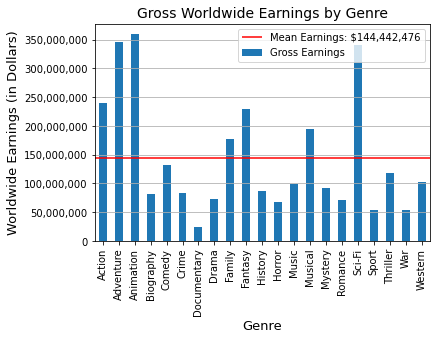

In [79]:
#Plot by Genre and Average Gross Earnings to figure out the most profitable genres. 
genres_df.plot(kind = 'bar')

#Set up the title of the graph. 
plt.title("Gross Worldwide Earnings by Genre",fontsize = 14)

#Setup the x-axis label and y-axis label of the graph.
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Worldwide Earnings (in Dollars)',fontsize = 13)
axes = plt.gca()
axes.yaxis.grid()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks().tolist()])

#Insert mean gross worldwide earning
plt.hlines(y=genres_df['Gross Earnings'].mean(),xmin=-.5, xmax=20.5,color='red',label=f"Mean Earnings: ${genres_df['Gross Earnings'].mean():,.0f}") 

plt.legend()
plt.show()

#Research Question 3: Which principal actors are the most profitable? 
#1. Join IMDB Titles_Basics with IMDB_Principals to match movie titles with actors
#2. Join IMDB Name_basics with IMDB_Movie_basics to match actor names with unique Identifier 
#3. Drop all actors with values in "Date of Death" column 
#4. Join actor dataframe with genres-and-earnings dataframe to match actors with corresponding gross earnings information and genres
#5. Compute average earnings per actor; sort list by highest earning actor and get top 3(?) highest earning actors per genre 

In [80]:
print(imdb.shape)
print(imdb_names.shape)
print(imdb_principals.shape)

(146144, 32)
(606648, 6)
(1028186, 6)


In [81]:
#Step 1: Clean up names dataframe (get rid of spaces in column titles, look for dupes in nconst and primary_name and null values in primary_name)
imdb_names.columns.str.replace(' ', '')
imdb_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [82]:
# Check for null values in Names dataframe
imdb_names['nconst'].isna().sum()

0

In [83]:
imdb_names = imdb_names.sort_values(by=['primary_name'])

In [84]:
names_dupes = imdb_names.loc[imdb_names.duplicated(subset=['primary_name'],keep=False) == True]
names_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
129377,nm10275444,A. Venkatesh,NaN,NaN,director,tt9319898
387377,nm8956236,A. Venkatesh,NaN,NaN,producer,tt6834466
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer","tt4976496,tt6765648,tt4318038,tt6827080"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor","tt0984177,tt0327761,tt0072026,tt4160030"
30159,nm0451160,A.J. Khan,1977.0,NaN,"actress,make_up_department,director","tt0203536,tt1651142,tt0367014,tt0323108"
...,...,...,...,...,...,...
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer","tt4368072,tt10046236,tt7717990,tt4764942"
102820,nm2561272,Øystein Mamen,NaN,NaN,"cinematographer,camera_department,editor","tt2713778,tt6275296,tt3541092,tt0966566"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer,tt2660730
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804


In [85]:
id_dupes = imdb_names.loc[imdb_names.duplicated(subset=['nconst'],keep=False) == True]
id_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


In [86]:
print(names_dupes.shape)
print(imdb_names.shape)
print(50865/606648)

(50865, 6)
(606648, 6)
0.08384598646991336


In [87]:
#Duplicate names account for only 8% of my data. 
#I will drop these names since many of them must have different unique IDs as well (see A.Venkatesh, above)
#Since it would be inefficient to go through and figure out the right unique ID for each person, 
#it makes sense to drop for now. 
imdb_names = imdb_names.drop_duplicates(subset=['primary_name'], keep=False,)

In [88]:
#Confirming new shape of dataframe; duplicates should be dropped 
print(imdb_names.shape)
print(606648-555783)

(555783, 6)
50865


In [89]:
#Repeat cleaning process for Principals dataframe
imdb_principals.columns.str.replace(' ', '')
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [90]:
#Check for null values in Principals dataframe. 
imdb_principals['nconst'].isna().sum()

0

In [91]:
#Sort rows by nconst number
imdb_principals = imdb_principals.sort_values(by=['nconst'])
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [92]:
# Assess duplicates situation - there are a lot of duplicate Unique Person IDs ("nconst"), but...
principals_dupes = imdb_principals.loc[imdb_principals.duplicated(subset=['nconst'],keep=False) == True]
principals_dupes.shape

(582339, 6)

In [93]:
# Each duplicated  Person ID/("nconst") seems to be associated with a Unique Move ID ("tconst"),
# Which makes sense if the same person was in multiple movies. No need to drop these 582,339 duplicates. 
principals_dupes.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [94]:
# Checking this hypothesis
imdb_principals.duplicated(subset=['tconst', 'nconst']).sum()

38

In [95]:
# So there are only a small number of rows with both a duplicated Person ID and Movie ID. 
dupe_movies_and_names = imdb_principals.loc[imdb_principals.duplicated(subset=['nconst','tconst'],keep=False) == True]
dupe_movies_and_names.head(10)

,tconst,ordering,nconst,category,job,characters
646999,tt5473578,8,nm0149828,actress,NaN,NaN
646994,tt5473578,3,nm0149828,actress,NaN,NaN
723770,tt4537170,2,nm0172826,actor,NaN,NaN
723776,tt4537170,8,nm0172826,actor,NaN,NaN
695178,tt6549064,2,nm0244327,actress,NaN,"[""Nadeen""]"
695183,tt6549064,7,nm0244327,actress,NaN,"[""Nadeen""]"
647034,tt5495582,1,nm0406809,actor,NaN,NaN
647042,tt5495582,9,nm0406809,actor,NaN,NaN
765019,tt6664852,5,nm0605583,actor,NaN,NaN
765016,tt6664852,2,nm0605583,actor,NaN,NaN


In [96]:
print(dupe_movies_and_names.shape)
# Makes sense because 38*2 = 76 

(76, 6)


In [97]:
# Dropping above duplicates anyway, even though 38 duplicates out of 1,028,186 is pretty insignificant 
imdb_principals = imdb_principals.drop_duplicates(subset=['tconst','nconst'], keep='first')

In [98]:
print(imdb_principals.shape)
print(1028148+38)

(1028148, 6)
1028186


In [99]:
print(imdb_principals.shape)
print(imdb_names.shape)

(1028148, 6)
(555783, 6)


In [100]:
# Merge Principals and Names dataframes to match Unique IDs with actors names; so every actor name can be matched to a unique tconst movie ID. 
principals_and_names = pd.merge(
    imdb_principals,
    imdb_names,
    how='inner',
    on ='nconst')
principals_and_names.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
7,tt2327430,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
8,tt2056773,1,nm0000005,archive_footage,NaN,NaN,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
9,tt9209768,1,nm0000005,self,NaN,"[""Himself (voice)""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


In [101]:
principals_and_names.shape
#Resultant dataframe smaller

(946037, 11)

In [102]:
principals_and_names.duplicated(subset=['tconst', 'nconst']).sum()
#No duplicates! 

0

In [103]:
#Now drop all rows that have a value in "death_year," as we want to recommend actors who are still alive. 
# Get indexes where death_year column has a value
principals_and_names = principals_and_names[principals_and_names['death_year'].isna()]
print(principals_and_names.shape)

(935020, 11)


In [104]:
#Filter out all non-actors and actresses in "primary_profession" column. 
actors = principals_and_names[principals_and_names["primary_profession"].str.contains('actor|actress', na=False)]

In [105]:
actors.shape

(447524, 11)

In [106]:
actors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
51,tt3169638,9,nm0000047,self,NaN,"[""Herself""]",Sophia Loren,1934.0,NaN,"actress,soundtrack","tt0054749,tt0076085,tt0060121,tt0058335"
52,tt5888614,3,nm0000047,self,NaN,"[""Herself""]",Sophia Loren,1934.0,NaN,"actress,soundtrack","tt0054749,tt0076085,tt0060121,tt0058335"


In [107]:
#Filter out actors born before 1939 (sorry Clint Eastwood)
actors = actors[actors['birth_year'] > 1939]
actors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
40141,tt6039872,4,nm0111232,actor,NaN,NaN,Tom Brokaw,1940.0,NaN,"writer,producer,actor","tt0436836,tt0231035,tt4005358,tt0103396"
174802,tt1811381,1,nm0905147,actress,NaN,"[""Narrator""]",Jutta Wachowiak,1940.0,NaN,actress,"tt0232146,tt0081711,tt0091367,tt0219849"
141903,tt6400222,2,nm0698928,actor,NaN,NaN,Gilles Proulx,1940.0,NaN,actor,"tt0832275,tt0211914,tt0070933,tt0110390"
84580,tt1650540,8,nm0359372,self,NaN,"[""Himself""]",Herbie Hancock,1940.0,NaN,"soundtrack,composer,actor","tt0094894,tt0090557,tt0060176,tt0071402"
84581,tt3088318,2,nm0359372,self,NaN,"[""Himself""]",Herbie Hancock,1940.0,NaN,"soundtrack,composer,actor","tt0094894,tt0090557,tt0060176,tt0071402"
...,...,...,...,...,...,...,...,...,...,...,...
762422,tt4100182,2,nm6446418,actor,NaN,"[""Guyus""]",Gaius Lee DuPree,2013.0,NaN,"actor,cinematographer","tt4041788,tt3776720,tt4648810,tt4768296"
873540,tt6023560,3,nm8405397,archive_footage,NaN,"[""Herself""]",Indiana Feek,2014.0,NaN,actress,"tt4569878,tt8347504"
220567,tt10360096,3,nm10708650,actress,NaN,"[""Katie""]",Nayana Niter,2014.0,NaN,actress,NaN
201836,tt9392402,1,nm10306475,actress,NaN,"[""Buny""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"


In [108]:
#Join imdb_ratings and actors dataframe by "tconst" column to match movie IDs, actor, and average rating
#First, check for duplicates in imdb_ratings
imdb_ratings.duplicated().sum()

0

In [109]:
#Then, merge: 
actors_and_ratings = pd.merge(
    actors,
    imdb_ratings,
    how='inner',
    on ='tconst')
actors_and_ratings

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
1,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
2,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587
3,tt4591310,4,nm3370295,actor,NaN,"[""Zhu Bajie""]",Shenyang Xiao,1981.0,NaN,"actor,director","tt1462900,tt4591310,tt5290882,tt8793220",6.0,2587
4,tt1092634,2,nm0000084,actress,NaN,"[""Anna Lan-Ting""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.4,8662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112896,tt8752420,5,nm9822023,director,NaN,NaN,Jorge Tudanca,1999.0,NaN,"director,writer,actor","tt9361888,tt8752420,tt8382210,tt9784954",8.4,10
112897,tt9800694,3,nm9828762,actor,NaN,NaN,Temmuz Gürkan Karaca,1987.0,NaN,actor,"tt1795096,tt2247207,tt7932896,tt9800694",5.4,7
112898,tt3588492,4,nm9836604,actress,NaN,"[""Serpil""]",Ebru Ozturk,1986.0,NaN,actress,tt8412590,4.1,176
112899,tt8478058,2,nm9879092,actor,NaN,"[""James Howard""]",Sali,1948.0,NaN,actor,tt8478058,8.5,6


In [110]:
#Clean up actors_and_ratings columns
actors_and_ratings.columns.str.replace(' ', '')
actors_and_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
1,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
2,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587
3,tt4591310,4,nm3370295,actor,NaN,"[""Zhu Bajie""]",Shenyang Xiao,1981.0,NaN,"actor,director","tt1462900,tt4591310,tt5290882,tt8793220",6.0,2587
4,tt1092634,2,nm0000084,actress,NaN,"[""Anna Lan-Ting""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.4,8662


In [111]:
#Drop distracting columns
actors_and_ratings = actors_and_ratings.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
1,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
2,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
3,tt4591310,nm3370295,actor,Shenyang Xiao,1981.0,"actor,director",6.0,2587
4,tt1092634,nm0000084,actress,Li Gong,1965.0,actress,6.4,8662
...,...,...,...,...,...,...,...,...
112896,tt8752420,nm9822023,director,Jorge Tudanca,1999.0,"director,writer,actor",8.4,10
112897,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
112898,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
112899,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


In [112]:
print(actors_and_ratings['category'].dtype)

object


In [113]:
#Filter out rows with anything other than "actor" or "actress" in "category" column. 
actors_and_ratings = actors_and_ratings[actors_and_ratings["category"].str.contains('actor|actress', na=False)]
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
1,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
2,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
3,tt4591310,nm3370295,actor,Shenyang Xiao,1981.0,"actor,director",6.0,2587
4,tt1092634,nm0000084,actress,Li Gong,1965.0,actress,6.4,8662
...,...,...,...,...,...,...,...,...
112895,tt8262666,nm9758704,actress,Jamie Leo,1999.0,actress,9.1,8
112897,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
112898,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
112899,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


In [114]:
#Average rating is not the only metric of concern. We have some very highly rated performances 
#that probably won't draw as many crowds because the actors are not popular (for example, Jake Bass, below). 
#I'll create a new column called rating-popularity that multiplies the average rating x the number of votes 
#the performance received, thus serving as a primitive metric for how popular AND how highly rated the performance was. 
actors_and_ratings.sort_values(by=['numvotes'],ascending=False)

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
1451,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066
1450,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066
1452,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066
3341,tt1345836,nm0004266,actress,Anne Hathaway,1982.0,"actress,soundtrack,producer",8.4,1387769
3339,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769
...,...,...,...,...,...,...,...,...
45010,tt5592728,nm1560523,actress,Mythili,1990.0,"actress,soundtrack",4.6,5
45009,tt5592728,nm0558593,actor,Joy Mathew,1961.0,"actor,writer,director",4.6,5
31981,tt2017703,nm0048273,actress,Blanche Baker,1956.0,"actress,writer,producer",8.4,5
111867,tt3546868,nm5658430,actor,Jake Bass,1991.0,actor,9.2,5


In [115]:
actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']
actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

<ipython-input-115-b3585c45e334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating
1450,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066,16201380.8
1452,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066,16201380.8
1451,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066,16201380.8
3340,tt1345836,nm0000288,actor,Christian Bale,1974.0,"actor,editorial_department,producer",8.4,1387769,11657259.6
3339,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769,11657259.6
...,...,...,...,...,...,...,...,...,...
77524,tt6792126,nm2511348,actress,Anna Kulovaná,1981.0,actress,1.0,5,5.0
77525,tt6792126,nm4153825,actor,Petr Batek,1972.0,actor,1.0,5,5.0
42531,tt8446392,nm0129648,actress,Nathalie Caldonazzo,1969.0,actress,1.0,5,5.0
77522,tt6792126,nm0603184,actress,Dana Morávková,1971.0,"actress,soundtrack,miscellaneous",1.0,5,5.0


In [116]:
#Drop unnecessary columns to prepare to groupby
simple_actors_and_ratings = actors_and_ratings.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes'], axis=1)
simple_actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

,primary_name,popularity_&_rating
1450,Leonardo DiCaprio,16201380.8
1452,Ellen Page,16201380.8
1451,Joseph Gordon-Levitt,16201380.8
3340,Christian Bale,11657259.6
3339,Gary Oldman,11657259.6
...,...,...
77524,Anna Kulovaná,5.0
77525,Petr Batek,5.0
42531,Nathalie Caldonazzo,5.0
77522,Dana Morávková,5.0


In [117]:
# Group by nconst and then get name later on; merge on nconst 
actors_ranking = simple_actors_and_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
actors_ranking = actors_ranking.rename(columns={'mean':'pop_and_reviews','count':'count'})
actors_ranking.columns = actors_ranking.columns.droplevel(0)
actors_ranking = actors_ranking.sort_values(by=['pop_and_reviews'],ascending=False)

In [118]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [119]:
top_30 = actors_ranking.head(30)

In [120]:
top30_networth = pd.read_csv('data/zippedData/top30_networth.csv')
top30_networth = top30_networth.drop(columns = ['Unnamed: 2'], axis = 1)

In [121]:
top_30_join = pd.merge(
    top_30,
    top30_networth,
    how='inner',
    on ='primary_name')
top_30_join = top_30_join.drop(columns = ['count'], axis =1)
top_30_join['actability'] = top_30_join['pop_and_reviews']/1000000
top_30_join['costliness'] = top_30_join['est_net_worth']/1000000
top_30_join['costliness'] = top_30_join['costliness'].astype(int)
top_30_join = top_30_join.round({'actability':2})
top_30_join

,primary_name,pop_and_reviews,est_net_worth,actability,costliness
0,Leonardo DiCaprio,5199703.07,260000000,5.20,260
1,Idina Menzel,3877485.00,16000000,3.88,16
2,Robert Downey Jr.,3751983.99,300000000,3.75,300
3,Lucy Davis,3656452.50,3000000,3.66,3
4,Daniel Kaluuya,3083649.80,1000000,3.08,1
5,Donna Murphy,2857654.80,3000000,2.86,3
6,Ben Hardy,2763728.00,4000000,2.76,4
7,Alison Sudol,2667076.90,2000000,2.67,2
8,Kerry Washington,2605709.48,55000000,2.61,55
9,Kieran Culkin,2545035.00,5000000,2.55,5


In [123]:
import plotly.express as px

fig = px.scatter(top_30_join, x="costliness", y="actability",
                 hover_name="primary_name",labels=dict(actability="Actability", costliness="Costliness"))

fig.update_layout(
    title={
        'text': "Actability vs. Costliness, for Top 30 Actors",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(grid_ygap=0.2)

#fig.update_xaxes(
    #constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"


#fig.update_yaxes(
    #scaleanchor = "x",
    #scaleratio = 1
                
fig.update_traces(marker_size=9, selector=dict(type='scatter'))

fig.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***